# <font color='blue'>Module 8 - CCPS 844 Data Mining</font>
# Logistic Regression
Commonly used to estimate probability of instance belonging to specified class. positive if >50% (labeled "1"), otherwise labeled "0".<BR>
Logistic
Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular
class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model
predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.

In [1]:
#from sklearn import datasets
#iris = datasets.load_iris()

import numpy as np

from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
iris.get('feature_names')

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Selecting the petal width attribute as X to be used for training the model and y as 0 or 1 depeding on if the target is 2

In [2]:
#This cell  was added to have a dataframe with all three type of targets
#It is added only  to improve the understanding of the data.
import pandas as pd
df = pd.DataFrame(iris["data"], columns = ['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)'])
df["target"] = iris["target"]
df.tail(15)
myIRIS = df.iloc[[35,36,85,86,124,125]]
print(myIRIS.iloc[[1]])
print(myIRIS.iloc[0,:])

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
36                5.5               3.5                1.3               0.2   

    target  
36       0  
sepal length (cm)    5.0
sepal width (cm)     3.2
petal length (cm)    1.2
petal width (cm)     0.2
target               0.0
Name: 35, dtype: float64


In [3]:
myIRIS[['sepal length (cm)','sepal width (cm)',"target"]]
myIRIS.loc[:,['sepal length (cm)','sepal width (cm)',"target"]]

,sepal length (cm),sepal width (cm),target
35,5.0,3.2,0
36,5.5,3.5,0
85,6.0,3.4,1
86,6.7,3.1,1
124,6.7,3.3,2
125,7.2,3.2,2


In [4]:
myIRIS['target'].values

array([0, 0, 1, 1, 2, 2])

In [5]:
myIRIS[myIRIS['target']==2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
124,6.7,3.3,5.7,2.1,2
125,7.2,3.2,6.0,1.8,2


In [6]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
# explore the iris["target_names"] and iris["target"] for more details

C:\Users\cestaff\AppData\Local\Temp\ipykernel_1256\3021467288.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0


In [7]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]


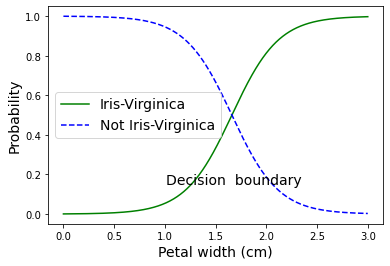

In [8]:
#import the matplotlib library for graphs
%matplotlib inline
import matplotlib.pyplot as plt

# train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X,y)

# predict probability of flowers with petal widths = 0-3cm 
# Generate 1000 evenly distributed values for petal width between 0-3cm
X_new             = np.linspace(0, 3, 1000).reshape(-1, 1)

#predict probability for each width to be Iris-Virginica
y_proba           = log_reg.predict_proba(X_new)
print(y_proba)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.show()

In [9]:
decision_boundary

array([1.66066066])

In [10]:
# what's the prediction for petal length = 1.5, 1.61, 1.62 or 1.7cm?
print(log_reg.predict([[1.5],[1.61],[1.62], [1.7]]))

[0 0 0 1]


C:\Users\cestaff\AppData\Local\Temp\ipykernel_1256\1087257224.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


(2.9, 7.0, 0.8, 2.7)

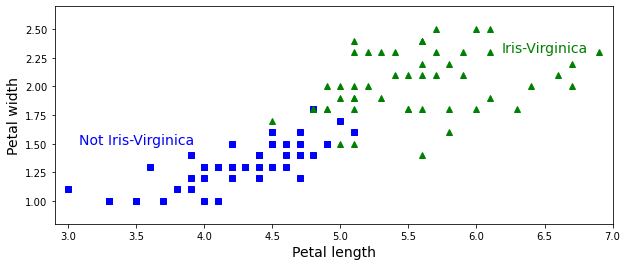

In [11]:
# Logistic Regressin contour plot
# with multiple decision boundaries (not just 50%)

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
         np.linspace(2.9, 7, 500).reshape(-1, 1),
         np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

# ravel(): return contiguous flattened array
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

In [12]:
# what's the prediction for petal width = 1.5, length=2.8 or width = 1.5, length=6cm?
print(log_reg.predict([[1.5,0.8],[2,6]]))

[0 1]
